In [ ]:
#### The code is from Irene Yi-Ju Su ####
from google.colab import drive
drive.mount ("/content/drive/")
import os
os.chdir ("/content/drive/MyDrive/TEST")

Mounted at /content/drive/


In [ ]:
import pandas as pd
import re
df_QA = pd.read_csv("QA_pairs.csv")
output_max_length = 1024

In [ ]:
from sentence_transformers import SentenceTransformer, CrossEncoder
from sklearn.metrics.pairwise import cosine_similarity
st_model = SentenceTransformer('all-mpnet-base-v2')
ce_model = CrossEncoder('cross-encoder/qnli-distilroberta-base')
def sentence_transformer_coherence(question, answer, score_model = st_model ):
    embeddings = score_model.encode([question, answer])
    similarity = cosine_similarity(embeddings[0].reshape(1, -1), embeddings[1].reshape(1, -1))[0][0]
    return similarity

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/689 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/329M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/261 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

In [ ]:
st_dataset, st_LLAMA, st_LLAMA_finetuned, st_GPT2, st_GPT2_finetuned = [], [], [], [], []
ce_dataset, ce_LLAMA, ce_LLAMA_finetuned, ce_GPT2, ce_GPT2_finetuned = [], [], [], [], []

for i in range(100):
    q = (df_QA['Question'][i])
    a = (df_QA['Dataset_Answer'][i])
    b = (df_QA['LLAMA_Answer'][i])
    f = (df_QA['LLAMA_Finetuned'][i])
    b2= (df_QA['GPT2_Answer'][i])
    f2= (df_QA['GPT2_Finetuned'][i])

    st_dataset.append(sentence_transformer_coherence(q, a))
    st_LLAMA.append(sentence_transformer_coherence(q, b))
    st_LLAMA_finetuned.append(sentence_transformer_coherence(q, f))
    st_GPT2.append(sentence_transformer_coherence(q, b2))
    st_GPT2_finetuned.append(sentence_transformer_coherence(q, f2))

    ce_dataset.append(ce_model.predict([[q, a]])[0])
    ce_LLAMA.append(ce_model.predict([[q, b]])[0])
    ce_LLAMA_finetuned.append(ce_model.predict([[q, f]])[0])
    ce_GPT2.append(ce_model.predict([[q, b2]])[0])
    ce_GPT2_finetuned.append(ce_model.predict([[q, f2]])[0])

In [ ]:
df_QA_pair_score = pd.DataFrame({
    'Question': df_QA['Question'][:100],
    'Dataset_Answer': df_QA['Dataset_Answer'][:100],
    'LLAMA_Answer': df_QA['LLAMA_Answer'][:100],
    'LLAMA_Finetuned': df_QA['LLAMA_Finetuned'][:100],
    'GPT2_Answer': df_QA['GPT2_Answer'][:100],
    'GPT2_Finetuned': df_QA['GPT2_Finetuned'][:100],

    'ST_Dataset': st_dataset,
    'ST_LLAMA': st_LLAMA,
    'ST_LLAMA_Finetuned': st_LLAMA_finetuned,
    'ST_GPT2': st_GPT2,
    'ST_GPT2_Finetuned': st_GPT2_finetuned,

    'CE_Dataset': ce_dataset,
    'CE_LLAMA': ce_LLAMA,
    'CE_LLAMA_Finetuned': ce_LLAMA_finetuned,
    'CE_GPT2': ce_GPT2,
    'CE_GPT2_Finetuned': ce_GPT2_finetuned,
})

In [ ]:
df_QA_pair_score[["ST_Dataset","ST_LLAMA","ST_LLAMA_Finetuned","ST_GPT2","ST_GPT2_Finetuned","CE_Dataset","CE_LLAMA","CE_LLAMA_Finetuned","CE_GPT2","CE_GPT2_Finetuned"]]

,ST_Dataset,ST_LLAMA,ST_LLAMA_Finetuned,ST_GPT2,ST_GPT2_Finetuned,CE_Dataset,CE_LLAMA,CE_LLAMA_Finetuned,CE_GPT2,CE_GPT2_Finetuned
0,0.715011,0.855263,0.751824,0.753815,0.691648,0.274104,0.336368,0.844111,0.039539,0.176568
1,0.305292,0.782333,0.603979,0.365324,0.768234,0.013473,0.946147,0.987276,0.027280,0.516900
2,0.526817,0.580995,0.560185,0.645988,0.530244,0.459664,0.451013,0.808640,0.338950,0.992403
3,0.579352,0.803613,0.678052,0.084665,0.446801,0.943980,0.845664,0.406224,0.778862,0.805684
4,0.601464,0.813726,0.206063,0.079210,0.669548,0.055477,0.946154,0.010748,0.038650,0.235754
...,...,...,...,...,...,...,...,...,...,...
95,0.733407,0.865482,0.847209,0.629948,0.729755,0.493545,0.982834,0.653364,0.177455,0.972959
96,0.424542,0.850751,0.863224,0.366295,0.592126,0.018288,0.931470,0.989820,0.648661,0.125846
97,0.701198,0.725752,0.575086,0.245425,0.637412,0.981742,0.987596,0.298929,0.050838,0.644615
98,0.660546,0.750528,0.569100,0.672489,0.748737,0.101782,0.861215,0.301031,0.005370,0.443947


In [ ]:
df_QA_pair_score.to_csv('QA_pairs_scoring_st_ce.csv', index=False)

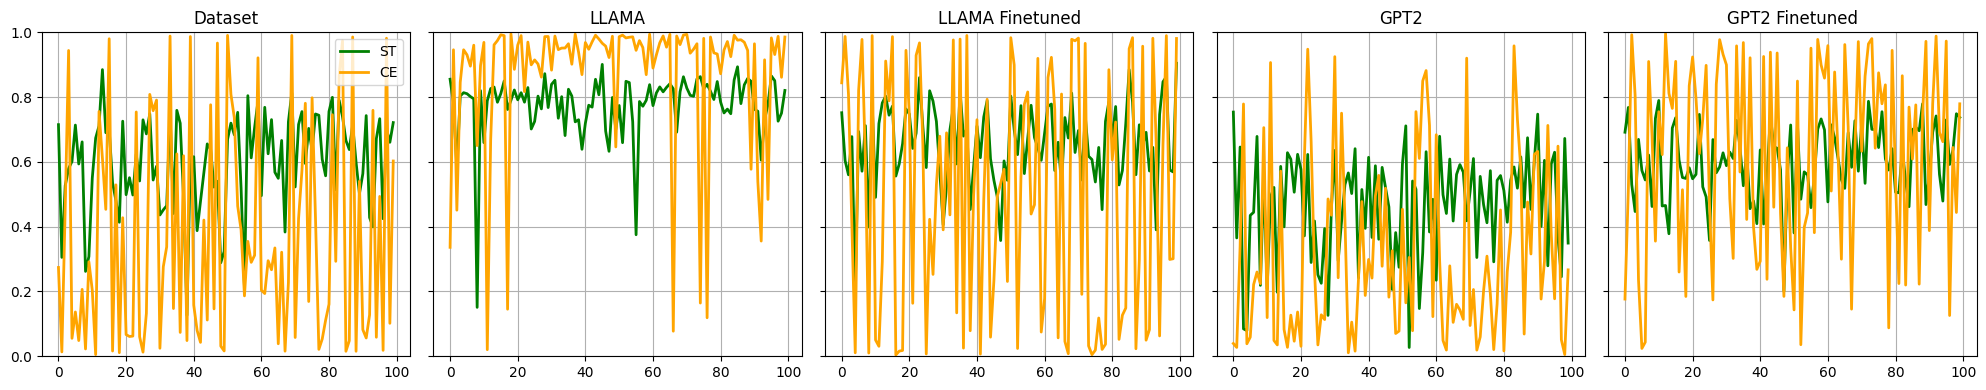

In [ ]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 5, figsize=(20, 4), sharey=True)

# Dataset
axs[0].plot(df_QA_pair_score['ST_Dataset'], color='green', linewidth=2, label='ST')
axs[0].plot(df_QA_pair_score['CE_Dataset'], color='orange', linewidth=2, label='CE')
axs[0].set_title('Dataset')
axs[0].legend()
axs[0].grid(True)

# LLAMA
axs[1].plot(df_QA_pair_score['ST_LLAMA'], color='green', linewidth=2, label='ST')
axs[1].plot(df_QA_pair_score['CE_LLAMA'], color='orange', linewidth=2, label='CE')
axs[1].set_title('LLAMA')
axs[1].grid(True)

# LLAMA Finetuned
axs[2].plot(df_QA_pair_score['ST_LLAMA_Finetuned'], color='green', linewidth=2, label='ST')
axs[2].plot(df_QA_pair_score['CE_LLAMA_Finetuned'], color='orange', linewidth=2, label='CE')
axs[2].set_title('LLAMA Finetuned')
axs[2].grid(True)

# GPT2
axs[3].plot(df_QA_pair_score['ST_GPT2'], color='green', linewidth=2, label='ST')
axs[3].plot(df_QA_pair_score['CE_GPT2'], color='orange', linewidth=2, label='CE')
axs[3].set_title('GPT2')
axs[3].grid(True)

# GPT2 Finetuned
axs[4].plot(df_QA_pair_score['ST_GPT2_Finetuned'], color='green', linewidth=2, label='ST')
axs[4].plot(df_QA_pair_score['CE_GPT2_Finetuned'], color='orange', linewidth=2, label='CE')
axs[4].set_title('GPT2 Finetuned')
axs[4].grid(True)

# Set y-axis limits for all subplots
for ax in axs:
   ax.set_ylim(0, 1)

plt.tight_layout()
plt.show()

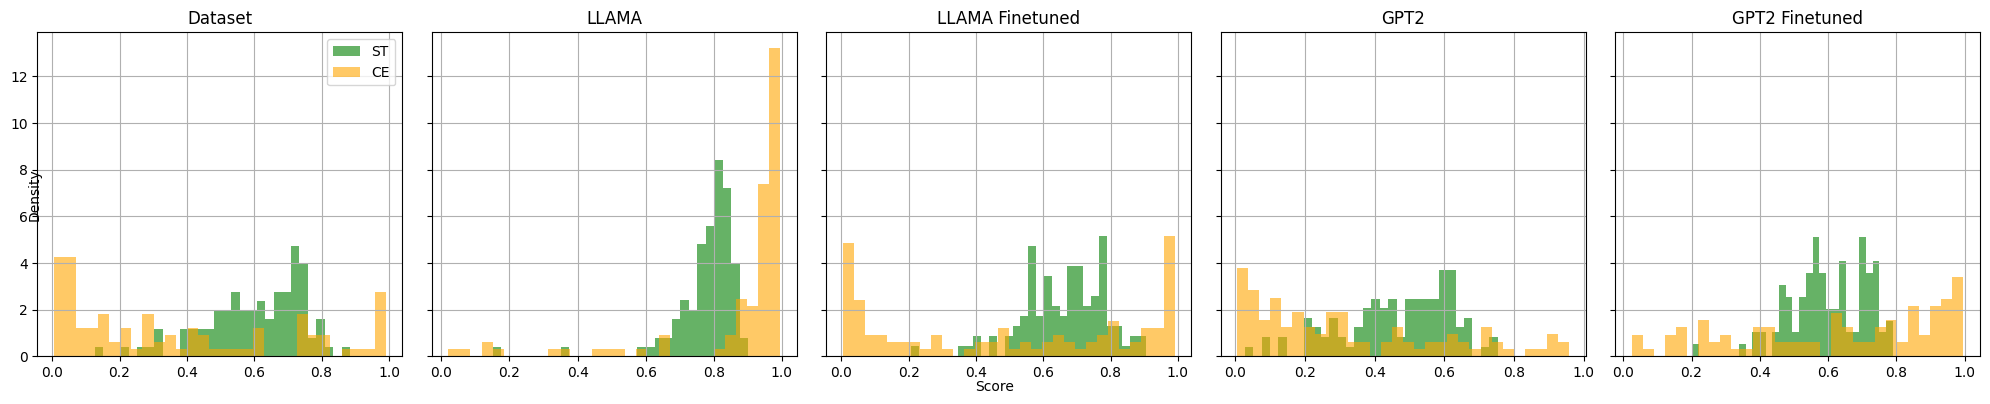

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create figure and axes
fig, axs = plt.subplots(1, 5, figsize=(20, 4), sharey=True)

# Define common histogram parameters
bins = 30
alpha = 0.6

# Dataset
axs[0].hist(df_QA_pair_score['ST_Dataset'], bins=bins, color='green', alpha=alpha, label='ST', density=True)
axs[0].hist(df_QA_pair_score['CE_Dataset'], bins=bins, color='orange', alpha=alpha, label='CE', density=True)
axs[0].set_title('Dataset')
axs[0].legend()
axs[0].grid(True)

# LLAMA
axs[1].hist(df_QA_pair_score['ST_LLAMA'], bins=bins, color='green', alpha=alpha, label='ST', density=True)
axs[1].hist(df_QA_pair_score['CE_LLAMA'], bins=bins, color='orange', alpha=alpha, label='CE', density=True)
axs[1].set_title('LLAMA')
axs[1].grid(True)

# LLAMA Finetuned
axs[2].hist(df_QA_pair_score['ST_LLAMA_Finetuned'], bins=bins, color='green', alpha=alpha, label='ST', density=True)
axs[2].hist(df_QA_pair_score['CE_LLAMA_Finetuned'], bins=bins, color='orange', alpha=alpha, label='CE', density=True)
axs[2].set_title('LLAMA Finetuned')
axs[2].grid(True)

# GPT2
axs[3].hist(df_QA_pair_score['ST_GPT2'], bins=bins, color='green', alpha=alpha, label='ST', density=True)
axs[3].hist(df_QA_pair_score['CE_GPT2'], bins=bins, color='orange', alpha=alpha, label='CE', density=True)
axs[3].set_title('GPT2')
axs[3].grid(True)

# GPT2 Finetuned
axs[4].hist(df_QA_pair_score['ST_GPT2_Finetuned'], bins=bins, color='green', alpha=alpha, label='ST', density=True)
axs[4].hist(df_QA_pair_score['CE_GPT2_Finetuned'], bins=bins, color='orange', alpha=alpha, label='CE', density=True)
axs[4].set_title('GPT2 Finetuned')
axs[4].grid(True)

# Add common x-label
fig.text(0.5, 0.02, 'Score', ha='center', va='center')
# Add common y-label
fig.text(0.02, 0.5, 'Density', ha='center', va='center', rotation='vertical')

# Adjust layout to prevent label cutoff
plt.tight_layout()
plt.show()